# EAC Economic Development Analysis

## Project Overview
This project analyzes the economic growth of East African Community (EAC) countries, focusing on key metrics such as GDP, GDP per capita, political indicators, and foreign direct investment (FDI) from 2005 to 2022. The analysis includes Burundi, Kenya, Rwanda, Tanzania, and Uganda, providing a comprehensive view of their economic development within the EAC.

## Objectives

#### Objective A: Economic Development Comparison
1. Analyze GDP, GDP growth rates, and GDP per capita across EAC countries from 2005 to 2022.
2. Identify disparities in economic growth among the EAC nations and propose actionable insights for fostering equitable development.

#### Objective B: Feature Correlations
1. Investigate correlations between political indicators and FDI and economic performance.

#### Objective C: Political Analysis
1. Assess the influence of political stability and governance on economic growth rates in EAC countries.
2. Analyze the correlation between governance indicators (e.g., control of corruption, rule of law) and economic performance.

#### Objective D: Foreign Direct Investment (FDI) Analysis
1. Examine FDI trends in EAC countries and their impact on economic growth.

## Key insights are detailed in the README file.


### Import the necessary libraries for the project

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### reading the file and merging data sets

The dataset was collected from the World Bank and consists of various indicators related to economics and politics. 

In [2]:
data = pd.read_csv('EAC_comparison.csv')

In [3]:
data.head()

,Country,Country Code,Indicator,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Burundi,BDI,Rule of Law: Estimate,-1.128,-0.983,-1.079,-1.038,-1.160,-1.205,-1.154,...,-1.076,-0.970,-1.186,-1.485,-1.415,-1.514,-1.454,-1.340,-1.313,-1.277
1,Burundi,BDI,Political Stability and Absence of Violence/Te...,-1.523,-1.428,-1.378,-1.636,-1.271,-1.626,-1.807,...,-1.350,-0.784,-1.937,-1.964,-2.003,-1.570,-1.625,-1.542,-1.258,-1.189
2,Burundi,BDI,Control of Corruption: Estimate,-0.957,-1.102,-1.167,-1.088,-1.133,-1.169,-1.208,...,-1.426,-1.268,-1.287,-1.278,-1.319,-1.478,-1.497,-1.563,-1.599,-1.518
3,Burundi,BDI,"Foreign direct investment, net inflows (% of GDP)",0.052,0.002,0.037,0.238,0.020,0.038,0.150,...,4.761,3.021,1.599,0.002,0.012,0.037,0.041,0.329,0.358,0.386
4,Burundi,BDI,"Foreign direct investment, net inflows (BoP, m...",0.585,0.032,0.500,3.833,0.348,0.781,3.355,...,116.727,81.747,49.623,0.055,0.316,0.984,1.045,8.722,9.934,12.884


# Data Cleaning!
### Checking the information of our merged dataset and for missing data

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       45 non-null     object 
 1   Country Code  45 non-null     object 
 2   Indicator     45 non-null     object 
 3   2005          45 non-null     float64
 4   2006          45 non-null     float64
 5   2007          45 non-null     float64
 6   2008          45 non-null     float64
 7   2009          45 non-null     float64
 8   2010          45 non-null     float64
 9   2011          45 non-null     float64
 10  2012          45 non-null     float64
 11  2013          45 non-null     float64
 12  2014          45 non-null     float64
 13  2015          45 non-null     float64
 14  2016          45 non-null     float64
 15  2017          45 non-null     float64
 16  2018          45 non-null     float64
 17  2019          45 non-null     float64
 18  2020          45 non-null     fl

In [5]:
data.isnull().sum()
# checking for missing values

Country         0
Country Code    0
Indicator       0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

#### Restructuring data

You might have noticed that most of the columns in our data set are for the different years. We want to change it so that all the years are combined into one column. Then, we'll have separate columns for each feature, with values for each year. This will make it easier to look at the data and analyze trends over time.



In [6]:
data.columns

Index(['Country ', 'Country Code', 'Indicator', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [7]:
# Melt the Data: Convert wide-format data into long-format 
#It combines year columns into a single 'Year' column and keeps 'Country Name' and 'Series Name' as identifiers.
melted_data = pd.melt(
    data,
    id_vars=['Country ', 'Country Code','Indicator'],
    var_name='Year',
    value_name='Value'
)

# Pivot the Data: Transform the long-format data back into a wide format.
#This creates columns for each 'Series Name' with corresponding values for each 'Year'.
data1 = melted_data.pivot_table(
    index=['Country ', 'Country Code', 'Year'],
    columns='Indicator',
    values='Value'
).reset_index()

data1.head()


Indicator,Country,Country Code,Year,Control of Corruption: Estimate,"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, million current US$)",GDP (current billion US$),GDP growth (annual %),GDP per capita (constant 2015 US$),GDP per capita growth (annual %),Political Stability and Absence of Violence/Terrorism: Estimate,Rule of Law: Estimate
0,Burundi,BDI,2005,-0.957,0.052,0.585,1.117,0.900,295.0,-2.765,-1.523,-1.128
1,Burundi,BDI,2006,-1.102,0.002,0.032,1.273,5.414,300.0,1.707,-1.428,-0.983
2,Burundi,BDI,2007,-1.167,0.037,0.500,1.356,3.452,299.0,-0.278,-1.378,-1.079
3,Burundi,BDI,2008,-1.088,0.238,3.833,1.612,4.862,301.0,0.637,-1.636,-1.038
4,Burundi,BDI,2009,-1.133,0.020,0.348,1.781,3.813,297.0,-1.328,-1.271,-1.160


#### checking the information of our restructured DataFrame

In [8]:
# We have 12 columns total and 90 rows

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country                                                            90 non-null     object 
 1   Country Code                                                       90 non-null     object 
 2   Year                                                               90 non-null     object 
 3   Control of Corruption: Estimate                                    90 non-null     float64
 4   Foreign direct investment, net inflows (% of GDP)                  90 non-null     float64
 5   Foreign direct investment, net inflows (BoP, million current US$)  90 non-null     float64
 6   GDP (current  billion  US$)                                        90 non-null     float64
 7   GDP growth (annual %)       

In [10]:
data1.tail()

Indicator,Country,Country Code,Year,Control of Corruption: Estimate,"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, million current US$)",GDP (current billion US$),GDP growth (annual %),GDP per capita (constant 2015 US$),GDP per capita growth (annual %),Political Stability and Absence of Violence/Terrorism: Estimate,Rule of Law: Estimate
85,Uganda,UGA,2018,-1.051,3.205,1055.353,32.927,6.304,896.0,2.749,-0.702,-0.321
86,Uganda,UGA,2019,-1.177,3.686,1303.005,35.348,6.439,922.0,2.886,-0.694,-0.345
87,Uganda,UGA,2020,-1.068,3.169,1191.485,37.600,2.951,918.0,-0.423,-0.811,-0.347
88,Uganda,UGA,2021,-1.031,4.067,1648.240,40.530,3.537,921.0,0.264,-0.938,-0.367
89,Uganda,UGA,2022,-1.042,6.481,2952.942,45.565,4.588,934.0,1.498,-0.807,-0.383


In [11]:
data1.describe()

Indicator,Control of Corruption: Estimate,"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, million current US$)",GDP (current billion US$),GDP growth (annual %),GDP per capita (constant 2015 US$),GDP per capita growth (annual %),Political Stability and Absence of Violence/Terrorism: Estimate,Rule of Law: Estimate
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.677378,2.186578,608.939256,29.495433,5.258022,826.677778,2.296644,-0.828911,-0.580811
std,0.617495,1.720462,592.533796,28.309371,2.818831,398.388688,2.810052,0.563517,0.409596
min,-1.599000,0.002000,0.032000,1.117000,-3.900000,262.000000,-5.980000,-2.003000,-1.514000
25%,-1.070750,0.422500,97.262000,5.786750,3.858000,564.500000,0.689500,-1.256250,-0.905250
50%,-0.893500,2.008000,444.827000,25.477000,5.228500,819.500000,2.653000,-0.872500,-0.466500
75%,-0.417750,3.234250,966.840250,45.525250,6.797000,1006.750000,3.714250,-0.358500,-0.349000
max,0.776000,6.657000,2952.942000,113.420000,11.161000,1755.000000,8.260000,0.102000,0.172000


#### checking for duplicates


In [12]:
data1.duplicated().sum()

0

#### Checking the countries included in our dataset.

In [13]:
data1['Country '].unique()

array(['Burundi', 'Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [14]:
data1.dtypes

Indicator
Country                                                               object
Country Code                                                          object
Year                                                                  object
Control of Corruption: Estimate                                      float64
Foreign direct investment, net inflows (% of GDP)                    float64
Foreign direct investment, net inflows (BoP, million current US$)    float64
GDP (current  billion  US$)                                          float64
GDP growth (annual %)                                                float64
GDP per capita (constant 2015 US$)                                   float64
GDP per capita growth (annual %)                                     float64
Political Stability and Absence of Violence/Terrorism: Estimate      float64
Rule of Law: Estimate                                                float64
dtype: object

In [15]:
# change year from type str to type int
data1['Year']=data1['Year'].astype(int)

# Data Exploration and visualization!

 Our data is now clean and ready for analysis. Let’s explore it to answer some key questions about the dataset.

# OBJECTIVE A: Economic Development Comparison

## Question 1: How is the state of economic development in the East African community based on GDP metrics

First,  we'll calculate the average (GDP, GDP per capita, GDP growth rate) for each country. Next, we'll analyze and compare the GDP trends for each country to determine which country has the highest growth over time. 

In [16]:
data1.columns

Index(['Country ', 'Country Code', 'Year', 'Control of Corruption: Estimate',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net inflows (BoP, million current US$)',
       'GDP (current  billion  US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita growth (annual %)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Rule of Law: Estimate'],
      dtype='object', name='Indicator')

### GDP ANALYSIS

#### GDP 2005 VS 2022

In [17]:
gdp_combined = data1[data1['Year'].isin([2005, 2022])][['Country ', 'Year', 'GDP (current  billion  US$)']].sort_values(by='Year', ascending=True)
gdp_combined['Year'] = gdp_combined['Year'].replace({2005: 'GDP_2005', 2022: 'GDP_2022'})
gdp_combined.reset_index(drop=True)

Indicator,Country,Year,GDP (current billion US$)
0,Burundi,GDP_2005,1.117
1,Kenya,GDP_2005,18.738
2,Rwanda,GDP_2005,2.934
3,Tanzania,GDP_2005,18.395
4,Uganda,GDP_2005,9.239
5,Burundi,GDP_2022,3.339
6,Kenya,GDP_2022,113.420
7,Rwanda,GDP_2022,13.316
8,Tanzania,GDP_2022,75.770
9,Uganda,GDP_2022,45.565


#### GDP 2005 VS 2022 Visualization

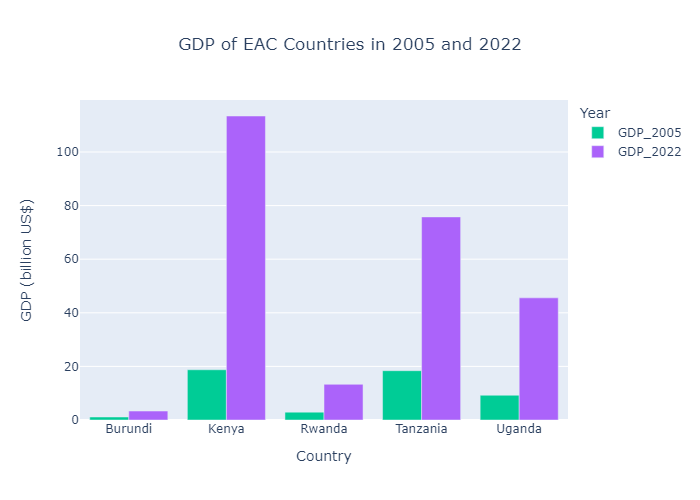

In [18]:
# Create the bar graph with countries on the x-axis and grouped bars for each year
fig = px.bar(
    gdp_combined,
    x='Country ',
    y='GDP (current  billion  US$)',
    color='Year',
    color_discrete_map={'2005': 'blue', '2022': 'green'},  # Define blue for 2005 and green for 2022
    barmode='group',
    labels={'Country ': 'Country', 'GDP (current  billion  US$)': 'GDP (billion US$)'},
    title='GDP of EAC Countries in 2005 and 2022'
)

# Center the title
fig.update_layout(title_x=0.5)

# Show the plot
fig.show("png")

#### GDP Percentage Increase

In [19]:
# Pivot the DataFrame to have years as columns
gdp_pivot = data1.pivot(index='Country ', columns='Year', values='GDP (current  billion  US$)')

# Calculate the percentage increase in GDP from 2005 to 2022
gdp_pivot['Percentage Increase'] = ((gdp_pivot[2022] - gdp_pivot[2005]) / gdp_pivot[2005]) * 100

# Display the results
Percentage_Increase=gdp_pivot['Percentage Increase'].sort_values(ascending=False)
Percentage_Increase


Country 
Kenya       505.294055
Uganda      393.181080
Rwanda      353.851397
Tanzania    311.905409
Burundi     198.925694
Name: Percentage Increase, dtype: float64

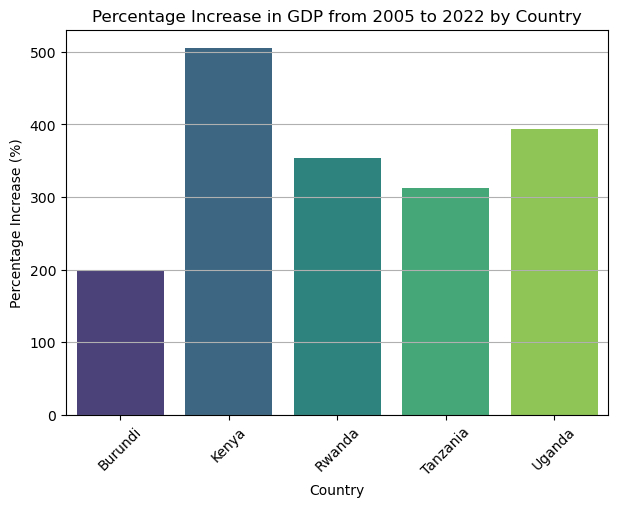

In [20]:
plt.figure(figsize=(7, 5))
sns.barplot(x=gdp_pivot.index, y=gdp_pivot['Percentage Increase'], palette='viridis')
plt.title('Percentage Increase in GDP from 2005 to 2022 by Country')
plt.xlabel('Country')
plt.ylabel('Percentage Increase (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### GDP trends visualization

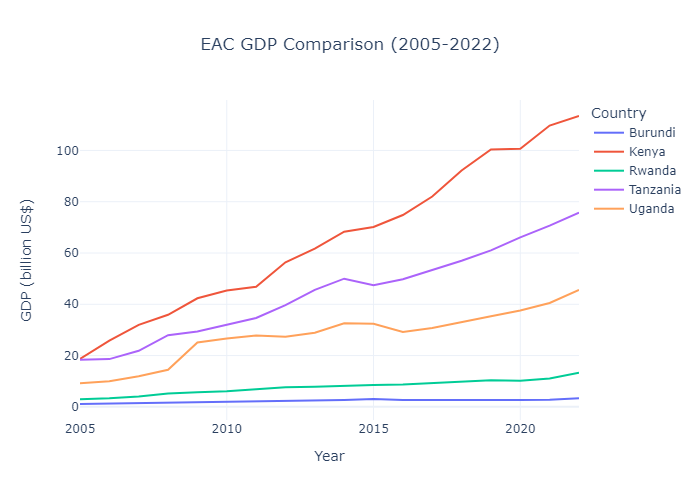

In [21]:
fig = px.line(data1, x='Year', y='GDP (current  billion  US$)', color='Country ',
             title='EAC GDP Comparison (2005-2022)',
             labels={'GDP (current  billion  US$)': 'GDP (billion US$)', 'Year': 'Year'},
             template='plotly_white')
             
fig.update_layout(title_x=0.5)  # Center the title

# Display the figure
fig.show("png")


#### Average GDP

In [22]:
# Calculate the average GDP for each country
average_gdp = data1.groupby('Country ')['GDP (current  billion  US$)'].mean()

# Extract values for the specified countries using .loc
countries_of_interest = ['Burundi', 'Rwanda', 'Kenya', 'Tanzania', 'Uganda']
avg_gdp_values = average_gdp.loc[countries_of_interest]

# Display the GDP values
avg_gdp_values.sort_values(ascending=False)


Country 
Kenya       65.373778
Tanzania    44.398278
Uganda      27.687333
Rwanda       7.718944
Burundi      2.298833
Name: GDP (current  billion  US$), dtype: float64

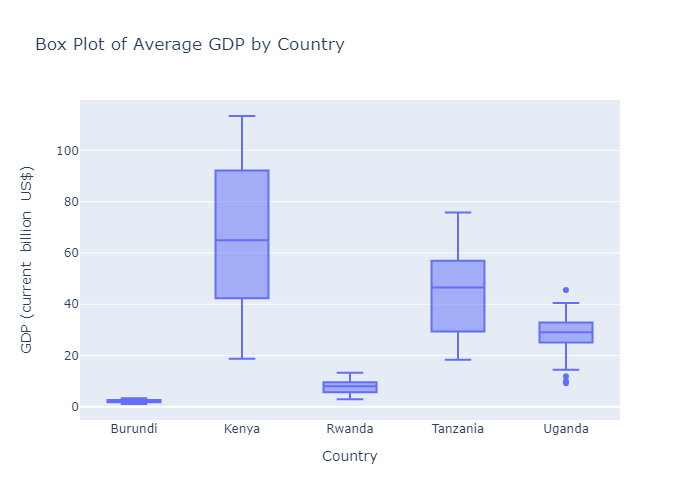

In [23]:
fig = px.box(data1, x='Country ', y='GDP (current  billion  US$)',
             title='Box Plot of Average GDP by Country',
             labels={'GDP (current  billion  US$)': 'GDP (current  billion  US$)', 'Country ': 'Country'})
fig.show("png")

### Comment
The data shows significant disparities in economic growth among East African Community (EAC) countries from 2005 to 2022. Kenya stands out with an impressive GDP increase of about 505.29%, reflecting its strong economy and development efforts. Uganda and Rwanda also performed well, with GDP growth rates of around 393.18% and 353.85%, respectively, indicating solid progress. Tanzania follows with a 311.91% increase, showing good economic development as well. In contrast, Burundi's growth is much slower, with a rise of only 198.93%, going from 1.12 billion USD in 2005 to 3.34 billion USD in 2022. While Kenya has the highest average GDP at 65.37 billion USD, Burundi lags far behind at just 2.30 billion USD. This data highlights the varying economic paths within the region, showing the need for more support for countries like Burundi to help them catch up with their neighbors.

### GDP PER CAPITA ANALYSIS

#### GDP per capita 2005 VS 2022

In [24]:
gdp_capita = data1[data1['Year'].isin([2005, 2022])][['Country ', 'Year', 'GDP per capita (constant 2015 US$)']].sort_values(by='Year', ascending=True)
gdp_capita['Year'] = gdp_capita['Year'].replace({2005: 'GDP_capita_2005', 2022: 'GDP_capita_2022'})
gdp_capita.reset_index(drop=True)

Indicator,Country,Year,GDP per capita (constant 2015 US$)
0,Burundi,GDP_capita_2005,295.0
1,Kenya,GDP_capita_2005,1222.0
2,Rwanda,GDP_capita_2005,447.0
3,Tanzania,GDP_capita_2005,676.0
4,Uganda,GDP_capita_2005,605.0
5,Burundi,GDP_capita_2022,262.0
6,Kenya,GDP_capita_2022,1755.0
7,Rwanda,GDP_capita_2022,940.0
8,Tanzania,GDP_capita_2022,1058.0
9,Uganda,GDP_capita_2022,934.0


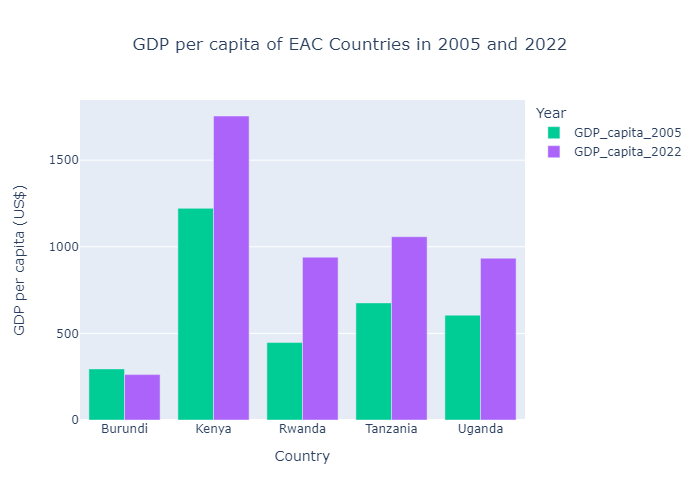

In [25]:
# Create the bar graph with countries on the x-axis and grouped bars for each year
fig = px.bar(
    gdp_capita,
    x='Country ',
    y='GDP per capita (constant 2015 US$)',
    color='Year',
    color_discrete_map={'2005': 'blue', '2022': 'green'},  # Define blue for 2005 and green for 2022
    barmode='group',
    labels={'Country ': 'Country','GDP per capita (constant 2015 US$)': 'GDP per capita (US$)'},
    title='GDP per capita of EAC Countries in 2005 and 2022'
)

# Center the title
fig.update_layout(title_x=0.5)

# Show the plot
fig.show("png")

#### GDP trends visualization

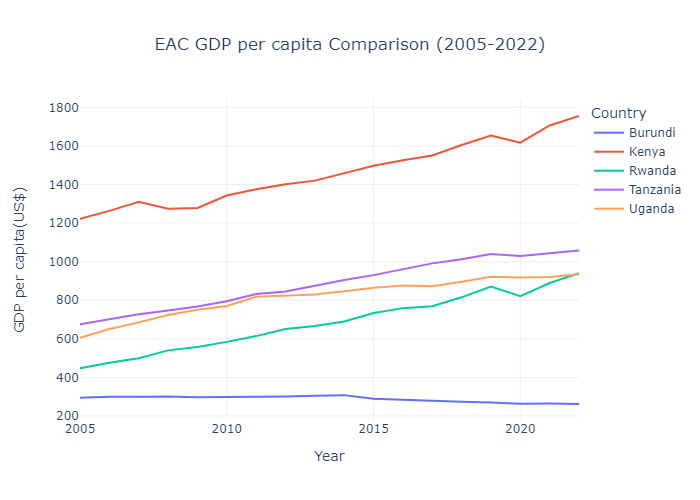

In [26]:
fig = px.line(data1, x='Year', y='GDP per capita (constant 2015 US$)', color='Country ',
             title='EAC GDP per capita Comparison (2005-2022)',
             labels={'GDP per capita (constant 2015 US$)': 'GDP per capita(US$)', 'Year': 'Year'},
             template='plotly_white')
             
fig.update_layout(title_x=0.5)  # Center the title

# Display the figure
fig.show("png")


In [27]:
# Pivot the DataFrame to have years as columns
gdp_capita_pivot = data1.pivot(index='Country ', columns='Year', values='GDP per capita (constant 2015 US$)')

# Calculate the percentage increase in GDP from 2005 to 2022
gdp_capita_pivot['Percentage Increase'] = ((gdp_capita_pivot[2022] - gdp_capita_pivot[2005]) / gdp_capita_pivot[2005]) * 100

# Display the results
Capita_Percentage_Increase=gdp_capita_pivot['Percentage Increase'].sort_values(ascending=False)

Capita_Percentage_Increase


Country 
Rwanda      110.290828
Tanzania     56.508876
Uganda       54.380165
Kenya        43.617021
Burundi     -11.186441
Name: Percentage Increase, dtype: float64

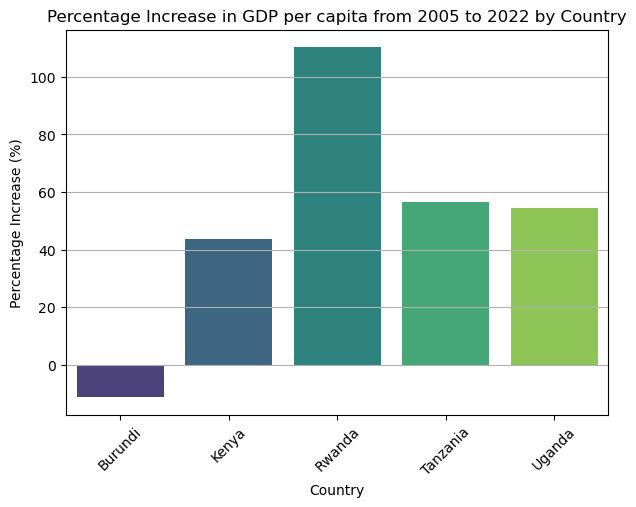

In [28]:
plt.figure(figsize=(7, 5))
sns.barplot(x=gdp_pivot.index, y=gdp_capita_pivot['Percentage Increase'], palette='viridis')
plt.title('Percentage Increase in GDP per capita from 2005 to 2022 by Country')
plt.xlabel('Country')
plt.ylabel('Percentage Increase (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Average GDP per capita

In [29]:
# Calculate the average GDP per capita for each country
average_gdp_capita = data1.groupby('Country ')['GDP per capita (constant 2015 US$)'].mean()

# Extract values for Burundi and Rwanda
countries_of_interest = ['Burundi', 'Rwanda', 'Kenya', 'Tanzania', 'Uganda']
avg_gdp_capita = average_gdp_capita.loc[countries_of_interest]

# Display the Avg GDP per Capita values
avg_gdp_capita.sort_values(ascending=False)

Country 
Kenya       1458.555556
Tanzania     885.055556
Uganda       817.055556
Rwanda       684.611111
Burundi      288.111111
Name: GDP per capita (constant 2015 US$), dtype: float64

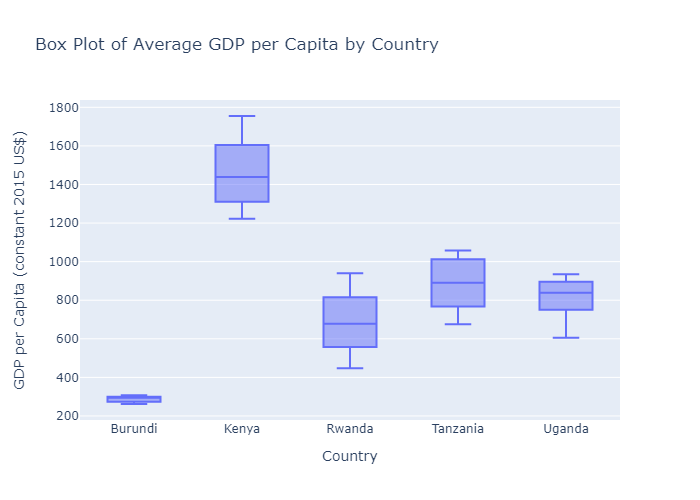

In [30]:
fig = px.box(data1, x='Country ', y='GDP per capita (constant 2015 US$)',
             title='Box Plot of Average GDP per Capita by Country',
             labels={'GDP per capita (constant 2015 US$)': 'GDP per Capita (constant 2015 US$)', 'Country': 'Country'})
fig.show("png")

### Comment
The data reveals key trends in GDP per capita for East African Community (EAC) countries between 2005 and 2022. Kenya leads with an average GDP per capita of 1,458.56 USD, suggesting a stronger economy compared to its neighbors. Tanzania follows with 885.06 USD, and Uganda has 817.06 USD, both reflecting solid economic growth. Rwanda is close behind at 684.61 USD. However, Burundi faces significant challenges, with a low average of just 288.11 USD and a decline of about 11.19%. This drop shows the serious economic difficulties Burundi is experiencing compared to other countries. Notably, Rwanda saw the highest growth at around 110.29%, while Tanzania and Uganda experienced increases of 56.51% and 54.38%, respectively. Overall, while some countries are improving their GDP per capita, Burundi still struggles, highlighting the need for targeted economic support in the region.

### GDP GROWTH RATE ANALYSIS

In [31]:
# Calculate the average GDP growth rate for each country
average_gdp_growth = data1.groupby('Country ')['GDP growth (annual %)'].mean()

# Extract values for the specified countries using .loc
countries_of_interest = ['Burundi', 'Rwanda', 'Kenya', 'Tanzania', 'Uganda']
avg_growth_values = average_gdp_growth.loc[countries_of_interest]

# Display the GDP growth values
avg_growth_values.sort_values(ascending=False)


Country 
Rwanda      7.267778
Tanzania    5.871778
Uganda      5.862222
Kenya       4.737833
Burundi     2.550500
Name: GDP growth (annual %), dtype: float64

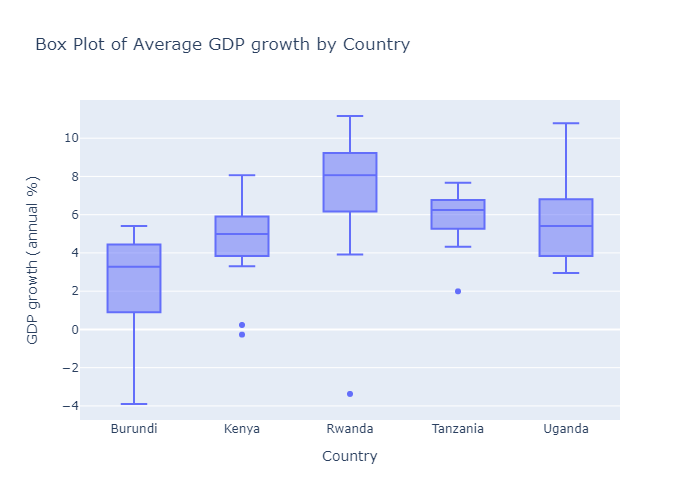

In [32]:
fig = px.box(data1, x='Country ', y='GDP growth (annual %)',
             title='Box Plot of Average GDP growth by Country',
             labels={'GDP growth (annual %)': 'GDP growth (annual %)', 'Country ': 'Country'})
fig.show("png")

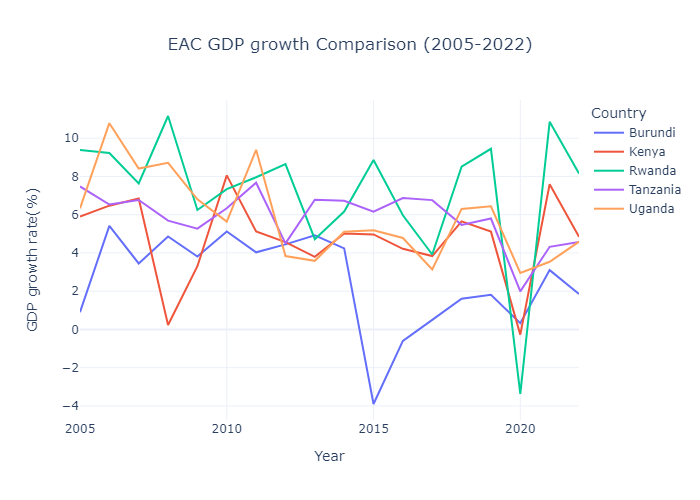

In [33]:
fig = px.line(data1, x='Year', y='GDP growth (annual %)', color='Country ',
             title='EAC GDP growth Comparison (2005-2022)',
             labels={'GDP growth (annual %)': 'GDP growth rate(%)', 'Year': 'Year'},
             template='plotly_white')
             
fig.update_layout(title_x=0.5)  # Center the title

# Display the figure
fig.show("png")

## Answer(1)
The economic development in the East African Community (EAC) shows a mixed picture based on GDP measures. Kenya has the highest total GDP, which suggests a strong economy, but its GDP per capita growth is low. This means that many people may not be feeling the benefits of this economic growth. Rwanda stands out with strong GDP growth and a notable increase in GDP per capita, indicating that more of its citizens are benefiting from the economy. Both Tanzania and Uganda are also seeing positive changes, with improvements in both GDP and GDP per capita, suggesting that their economies are growing and helping more people. On the other hand, Burundi is struggling, as it has low GDP growth and a decrease in GDP per capita, which points to ongoing difficulties in its economic development. Overall, while some EAC countries are making good progress, there is a need for better policies to ensure that economic benefits reach everyone.

# OBJECTIVE B: Feature Correlations

## Question 2 : What correlations exist between various features and GDP growth (annual %)?

### Correlation Matrix

 let's create a correlation matrix to explore the relationships of various economic indicators to GDP Growth rate for Burundi and Rwanda 

In [34]:
data1.columns

Index(['Country ', 'Country Code', 'Year', 'Control of Corruption: Estimate',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net inflows (BoP, million current US$)',
       'GDP (current  billion  US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita growth (annual %)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Rule of Law: Estimate'],
      dtype='object', name='Indicator')

In [35]:
corr_mat = data1.drop(['Country ', 'Year', 'Country Code'], axis=1).corr()

# Unstacking the correlation matrix to create pairs
corr_pairs = corr_mat.unstack()

# Removing self-correlations (where a variable is correlated with itself)
corr_pairs = corr_pairs[corr_pairs != 1]

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Filtering for pairs associated with 'GDP (current US$)(billion)'
gdp_corr = sorted_pairs.loc[sorted_pairs.index.get_level_values(0) == 'GDP growth (annual %)' ]

gdp_corr


Indicator              Indicator                                                        
GDP growth (annual %)  GDP (current  billion  US$)                                         -0.046193
                       GDP per capita (constant 2015 US$)                                   0.102489
                       Foreign direct investment, net inflows (BoP, million current US$)    0.111256
                       Foreign direct investment, net inflows (% of GDP)                    0.382236
                       Control of Corruption: Estimate                                      0.440013
                       Political Stability and Absence of Violence/Terrorism: Estimate      0.455335
                       Rule of Law: Estimate                                                0.486850
                       GDP per capita growth (annual %)                                     0.979811
dtype: float64

#### Visualizing the data

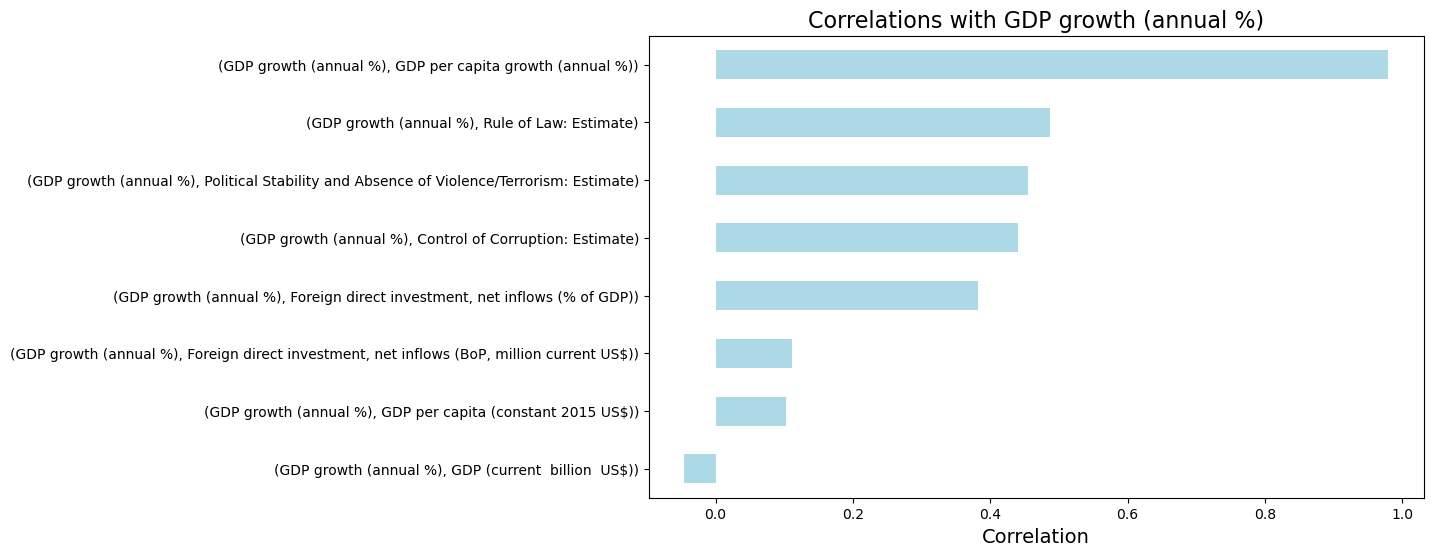

In [36]:

plt.figure(figsize=(10, 6))
gdp_corr.plot(kind='barh', color='lightblue')

# Add a title and labels
plt.title('Correlations with GDP growth (annual %)', fontsize=16)
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('')
plt.show()


### Answer(2): There is a correlation between  the other features and GDP growth (annual %).
The correlation results provide important insights into the economies of the East African Community. The negative correlation between GDP growth and total GDP suggests that larger economies might struggle to maintain high growth rates, possibly due to market saturation. On the other hand, the positive correlations with GDP per capita, foreign direct investment, and governance indicators show that improvements in these areas are related to better economic performance and stability. This highlights the need to encourage investment and strengthen institutions to support sustainable growth in the region.

# OBJECTIVE C : Political Analysis

## Question 3: How is political stability influencing economic growth in the EAC?

 The correlation results show that the political indicators in our dataset have a positive correlation to economic growth rate. Control of Corruption has a correlation of 0.440013 , Rule of Law has a correlation of 0.486850, and Political Stability and Absence of Violence/Terrorism has a correlation of 0.455335. Political stability plays a significant role in contributing to economic growth. These indicators are measured on a scale ranging from -2.5 representing the lowest (worst) governance score and 2.5, the highest (best) governance score.


## i)Control of corruption

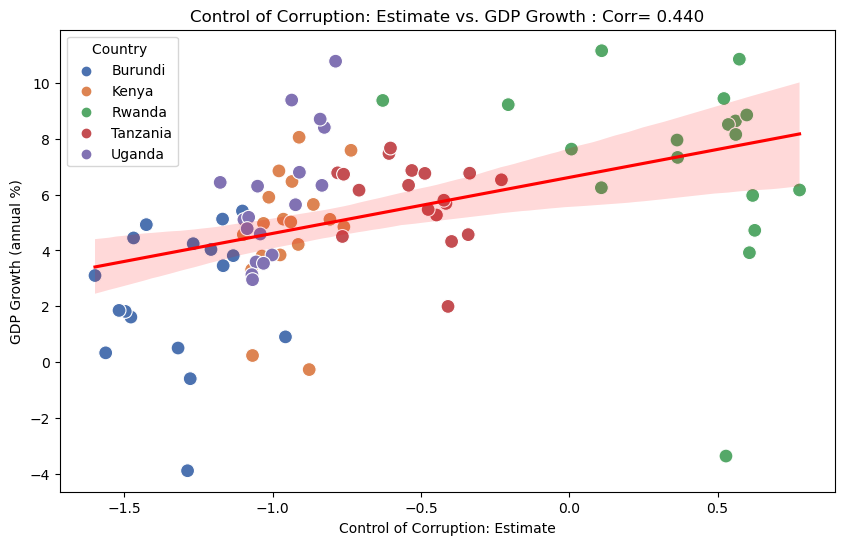

In [37]:
# Create a scatter plot for Control of Corruption  vs. GDP Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Control of Corruption: Estimate', y='GDP growth (annual %)', 
                hue='Country ', palette='deep', s=100)

# Add regression line
sns.regplot(data=data1, x='Control of Corruption: Estimate', y='GDP growth (annual %)',
            scatter=False, color='red')

plt.title('Control of Corruption: Estimate vs. GDP Growth : Corr= 0.440')
plt.xlabel('Control of Corruption: Estimate')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country ')
plt.show()


### EAC comparison for Control of Corruption(2005-2022)

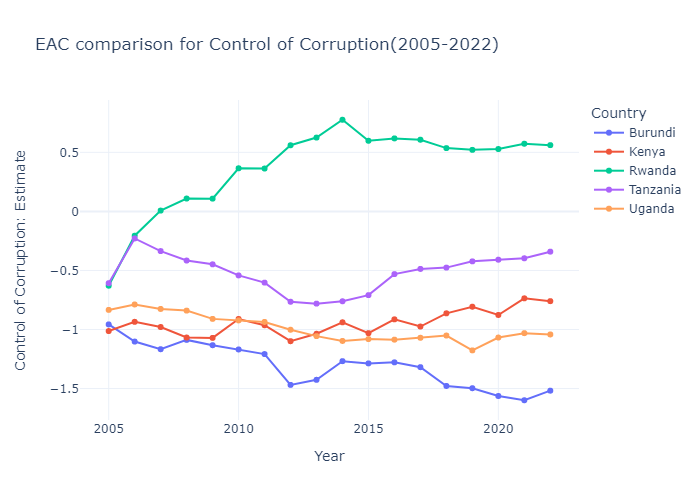

In [38]:
# Plotly line chart Control of Corruption: Estimate
fig = px.line(data1, 
              x='Year', 
              y='Control of Corruption: Estimate', 
              color='Country ',  
              title='EAC comparison for Control of Corruption(2005-2022)',  
              labels={'Unemployment': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
             )
# Show the figure
fig.show("png")



In [39]:
# Filter the data for 2005 and 2022
corruption_2005 = data1[data1['Year'] == 2005][['Country ', 'Control of Corruption: Estimate']].rename(columns={'Control of Corruption: Estimate': 'Corruption 2005'})
corruption_2022 = data1[data1['Year'] == 2022][['Country ', 'Control of Corruption: Estimate']].rename(columns={'Control of Corruption: Estimate': 'Corruption 2022'})

# Merge the data for 2005 and 2022 based on the Country column
merged_corruption = pd.merge(corruption_2005, corruption_2022, on='Country ')

# Calculate the percentage change
merged_corruption['Percentage Change'] = ((merged_corruption['Corruption 2022'] - merged_corruption['Corruption 2005']) / 
                                           abs(merged_corruption['Corruption 2005'])) * 100

# Display the DataFrame
print(merged_corruption)


Indicator  Country   Corruption 2005  Corruption 2022  Percentage Change
0           Burundi           -0.957           -1.518         -58.620690
1             Kenya           -1.013           -0.760          24.975321
2            Rwanda           -0.629            0.561         189.189189
3          Tanzania           -0.608           -0.341          43.914474
4            Uganda           -0.834           -1.042         -24.940048


#### Comment:
Burundi and Uganda experienced declines, with Burundi showing a significant drop of about -58.6%, indicating worsening corruption control.
Rwanda saw the most improvement with an increase of approximately 189.2%, reflecting substantial efforts in governance and anti-corruption reforms.
Tanzania and Kenya also showed improvements, with 43.9% and 24.98% increases, respectively, suggesting gradual progress.
The positive correlation (0.44) between the Control of Corruption and GDP growth suggests that better governance is associated with stronger economic performance in these countries, supporting the idea that reducing corruption positively influences economic outcomes. However, the variation among countries indicates that other factors may also play important roles.

## ii)Political Stability and Absence of Violence/Terrorism

In [40]:
data1.columns

Index(['Country ', 'Country Code', 'Year', 'Control of Corruption: Estimate',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net inflows (BoP, million current US$)',
       'GDP (current  billion  US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita growth (annual %)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Rule of Law: Estimate'],
      dtype='object', name='Indicator')

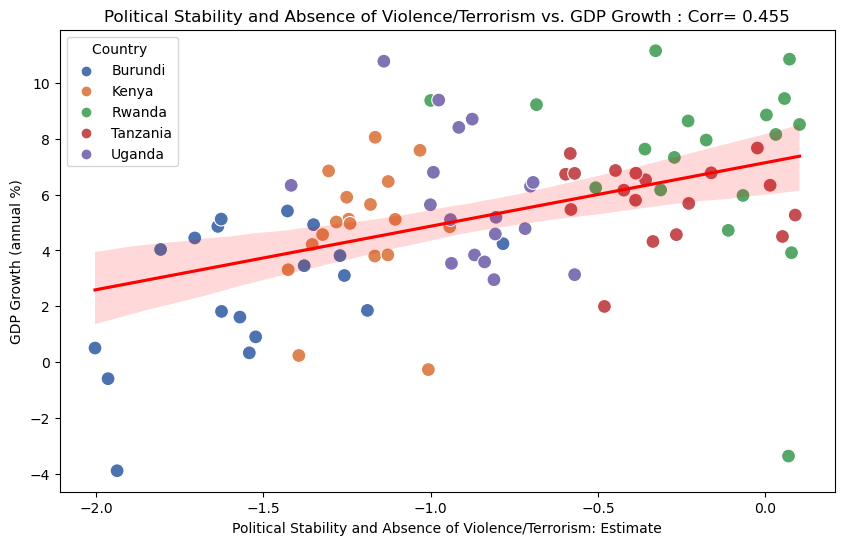

In [41]:
# Create a scatter plot for 'Political Stability and Absence of Violence/Terrorism vs. GDP Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Political Stability and Absence of Violence/Terrorism: Estimate', y='GDP growth (annual %)', 
                hue='Country ', palette='deep', s=100)

# Add regression line
sns.regplot(data=data1, x='Political Stability and Absence of Violence/Terrorism: Estimate', y='GDP growth (annual %)',
            scatter=False, color='red')

plt.title('Political Stability and Absence of Violence/Terrorism vs. GDP Growth : Corr= 0.455')
plt.xlabel('Political Stability and Absence of Violence/Terrorism: Estimate')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country ')
plt.show()


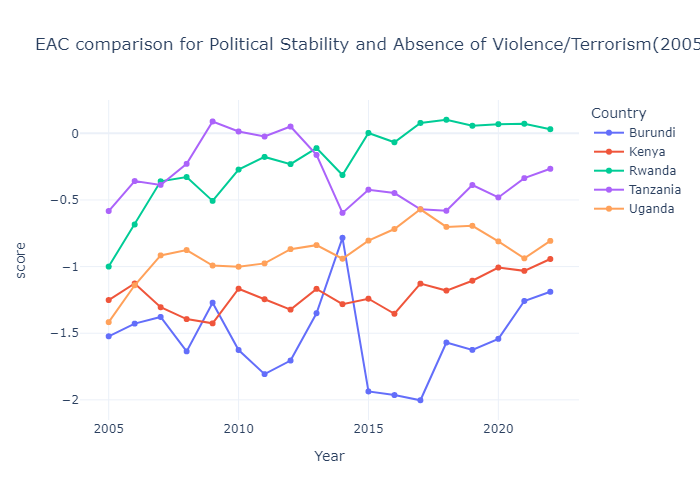

In [42]:
# Plotly line chart 'Political Stability and Absence of Violence/Terrorism
fig = px.line(data1, 
              x='Year', 
              y='Political Stability and Absence of Violence/Terrorism: Estimate', 
              color='Country ',  
              title='EAC comparison for Political Stability and Absence of Violence/Terrorism(2005-2022)',  
              labels={'Political Stability and Absence of Violence/Terrorism: Estimate': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
             )
# Show the figure
fig.show("png")



In [43]:
# Filter the data for 2005 and 2022
Political_Stability_2005 = data1[data1['Year'] == 2005][['Country ', 'Political Stability and Absence of Violence/Terrorism: Estimate']].rename(
    columns={'Political Stability and Absence of Violence/Terrorism: Estimate': 'Political_Stability_2005'})
Political_Stability_2022 = data1[data1['Year'] == 2022][['Country ', 'Political Stability and Absence of Violence/Terrorism: Estimate']].rename(
    columns={'Political Stability and Absence of Violence/Terrorism: Estimate': 'Political_Stability_2022'})

# Merge the data for 2005 and 2022 based on the Country column
merged_Political_Stability = pd.merge(Political_Stability_2005, Political_Stability_2022, on='Country ')

# Calculate the percentage change
merged_Political_Stability['Percentage Change'] = ((merged_Political_Stability['Political_Stability_2022'] - merged_Political_Stability['Political_Stability_2005']) / 
                                           abs(merged_Political_Stability['Political_Stability_2005'])) * 100

# Display the DataFrame
print(merged_Political_Stability)


Indicator  Country   Political_Stability_2005  Political_Stability_2022  \
0           Burundi                    -1.523                    -1.189   
1             Kenya                    -1.251                    -0.943   
2            Rwanda                    -1.000                     0.031   
3          Tanzania                    -0.583                    -0.266   
4            Uganda                    -1.417                    -0.807   

Indicator  Percentage Change  
0                  21.930401  
1                  24.620304  
2                 103.100000  
3                  54.373928  
4                  43.048694  


#### Comment
The data shows that Rwanda had the biggest improvement in political stability from 2005 to 2022, with a 103.1% increase, moving from negative to positive values. This suggests that its efforts in governance and security are working well. Tanzania and Uganda also made progress, with increases of 54.37% and 43.05%, showing gradual improvements. Kenya and Burundi had smaller changes of 24.62% and 21.93%, showing some progress but still remaining in negative stability. The correlation of 0.455335 indicates that as political stability gets better, other positive factors like economic growth or investment might also improve, but the connection is only moderate.

## i) Rule of law Analysis

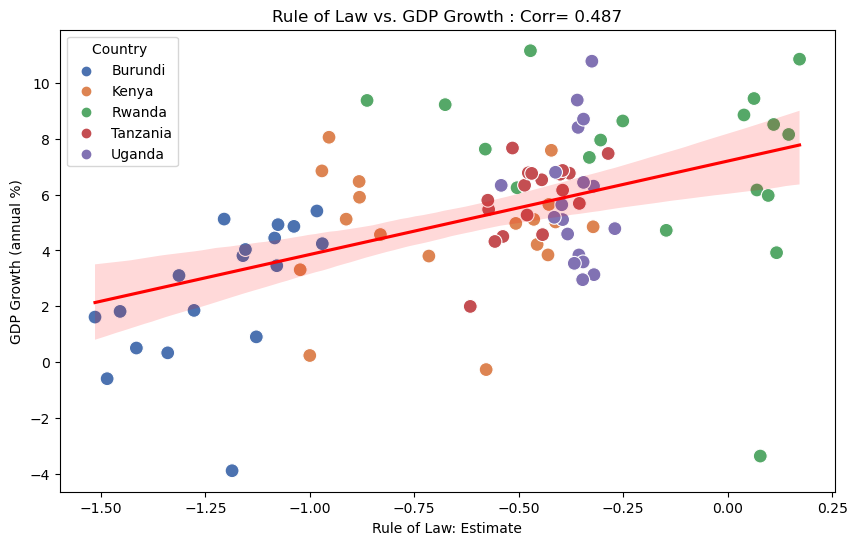

In [44]:
# Create a scatter plot for Rule of Law' vs. GDP Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Rule of Law: Estimate', y='GDP growth (annual %)', 
                hue='Country ', palette='deep', s=100)

# Add regression line
sns.regplot(data=data1, x='Rule of Law: Estimate', y='GDP growth (annual %)',
            scatter=False, color='red')

plt.title('Rule of Law vs. GDP Growth : Corr= 0.487')
plt.xlabel('Rule of Law: Estimate')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country ')
plt.show()


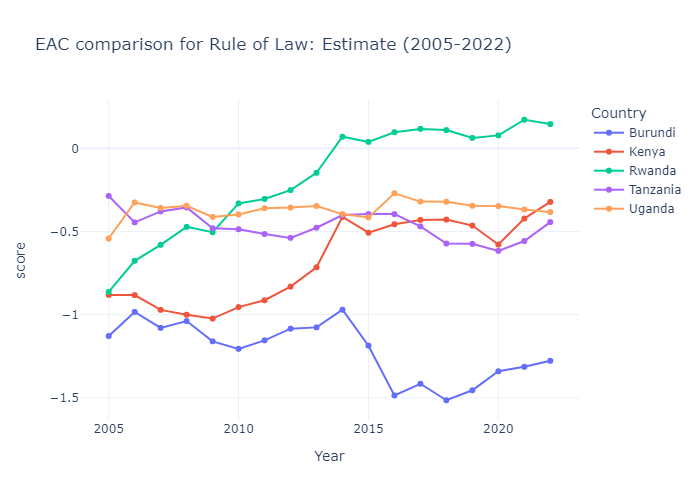

In [45]:
# Plotly line chart Rule of Law: Estimate
fig = px.line(data1, 
              x='Year', 
              y='Rule of Law: Estimate', 
              color='Country ',  
              title='EAC comparison for Rule of Law: Estimate (2005-2022)',  
              labels={'Rule of Law: Estimate': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
             )
# Show the figure
fig.show("png")



In [46]:
# Filter the data for 2005 and 2022
Rule_of_law_2005 = data1[data1['Year'] == 2005][['Country ', 'Rule of Law: Estimate']].rename(
    columns={'Rule of Law: Estimate': 'Rule_of_law_2005'})
Rule_of_law_2022 = data1[data1['Year'] == 2022][['Country ', 'Rule of Law: Estimate']].rename(
    columns={'Rule of Law: Estimate': 'Rule_of_law_2022'})

# Merge the data for 2005 and 2022 based on the Country column
merged_Rule_of_law = pd.merge(Rule_of_law_2005, Rule_of_law_2022, on='Country ')

# Calculate the percentage change
merged_Rule_of_law['Percentage Change'] = ((merged_Rule_of_law['Rule_of_law_2022'] - merged_Rule_of_law['Rule_of_law_2005']) / 
                                           abs(merged_Rule_of_law['Rule_of_law_2005'])) * 100

# Display the DataFrame
print(merged_Rule_of_law)


Indicator  Country   Rule_of_law_2005  Rule_of_law_2022  Percentage Change
0           Burundi            -1.128            -1.277         -13.209220
1             Kenya            -0.881            -0.322          63.450624
2            Rwanda            -0.863             0.146         116.917729
3          Tanzania            -0.286            -0.443         -54.895105
4            Uganda            -0.542            -0.383          29.335793


#### Comment:
The data shows that Rwanda had the most improvement in the rule of law between 2005 and 2022, with an increase of 116.92%, moving from a negative value to a positive one. This suggests strong progress in building trust in laws and institutions. Kenya also saw a significant rise of 63.45%, showing better legal frameworks and enforcement. Uganda had a smaller improvement of 29.34%, while Burundi and Tanzania experienced declines of -13.21% and -54.90%, indicating setbacks in their legal systems. The correlation of 0.486850 suggests that improving the rule of law is moderately linked to other positive outcomes like economic growth or stability.

### Answer(3)
Political indicators have a big impact on economic growth in the East African Community (EAC). The data shows a positive link between these political factors and economic growth rates. Specifically, Control of Corruption has a correlation of 0.44, Rule of Law is at 0.49, and Political Stability and Absence of Violence/Terrorism is at 0.46. This means that countries with better governance and political stability tend to see higher economic growth. For example, Rwanda has made significant progress in all political indicators, leading to a strong increase in GDP growth. This suggests that good governance can improve economic outcomes.

On the other hand, Burundi's declining political indicators, especially in corruption and stability, are connected to its economic difficulties, as shown by its low GDP growth and decreasing GDP per capita. Kenya has made strides in controlling corruption but still struggles with political stability, which affects its economic growth. Tanzania and Uganda have also had mixed results in their political conditions, reflecting their economic performance. Overall, this emphasizes the importance of improving governance and political stability to promote economic growth in the EAC, ensuring that the benefits of development reach all citizens.

# OBJECTIVE D: Foreign Direct Investment (FDI) Analysis

## Question 4: How does Foreign Direct Investment (FDI) impact economic growth in the EAC from 2005 to 2022? Additionally, how has the FDI growth rate influenced the overall economic performance?

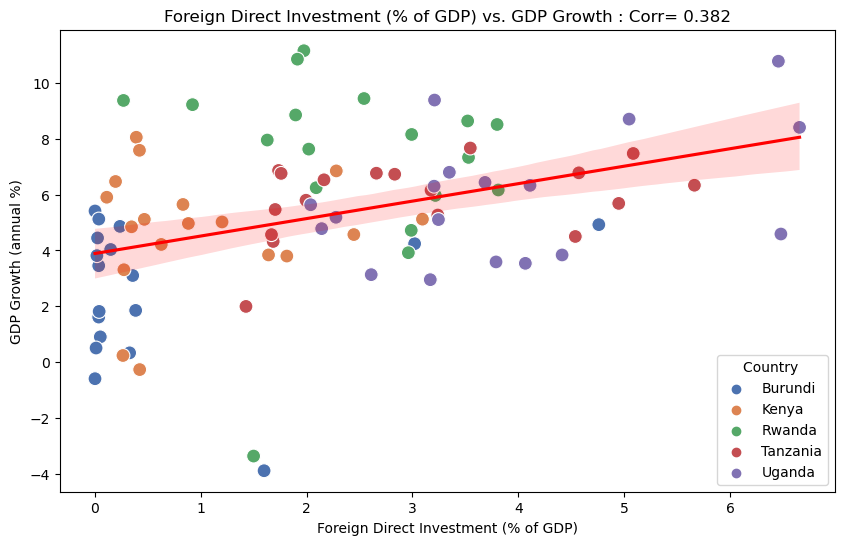

In [47]:
# Create a scatter plot for Foreign Direct Investment (% of GDP) vs. GDP Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Foreign direct investment, net inflows (% of GDP)', y='GDP growth (annual %)', 
                hue='Country ', palette='deep', s=100)

# Add regression line
sns.regplot(data=data1, x='Foreign direct investment, net inflows (% of GDP)', y='GDP growth (annual %)',
            scatter=False, color='red')

plt.title('Foreign Direct Investment (% of GDP) vs. GDP Growth : Corr= 0.382')
plt.xlabel('Foreign Direct Investment (% of GDP)')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country ')
plt.show()


In [48]:
data1.columns

Index(['Country ', 'Country Code', 'Year', 'Control of Corruption: Estimate',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net inflows (BoP, million current US$)',
       'GDP (current  billion  US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita growth (annual %)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Rule of Law: Estimate'],
      dtype='object', name='Indicator')

In [49]:
# Calculate the average Foreign direct investment, net inflows for each country
average_fdi = data1.groupby('Country ')[ 'Foreign direct investment, net inflows (BoP, million current US$)'].mean()

# Extract values for the specified countries using .loc
countries_of_interest = ['Burundi', 'Rwanda', 'Kenya', 'Tanzania', 'Uganda']
avg_fdi_values = average_fdi.loc[countries_of_interest]

# Display the GDP values
avg_fdi_values.sort_values(ascending=False)


Country 
Tanzania    1194.279722
Uganda      1027.889667
Kenya        606.529611
Rwanda       199.770833
Burundi       16.226444
Name: Foreign direct investment, net inflows (BoP, million current US$), dtype: float64

### Data Visualization of FDI, net inflows

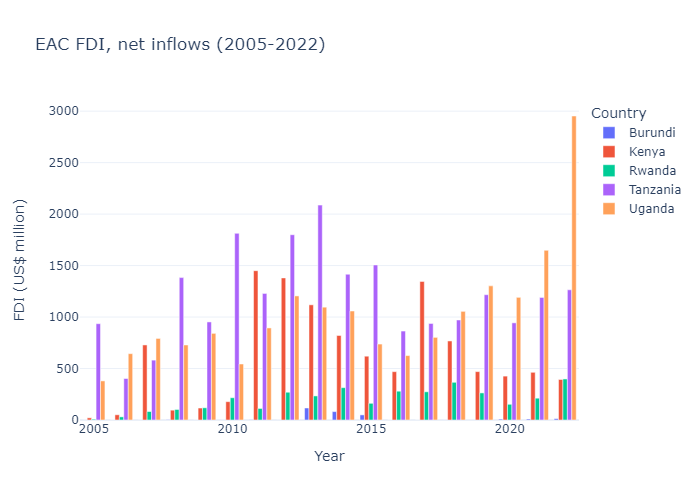

In [50]:
fig = px.bar(data1,
      x='Year', 
      y= 'Foreign direct investment, net inflows (BoP, million current US$)',  # FDI values on the y-axis
      color='Country ', 
      title='EAC FDI, net inflows (2005-2022)',  # Updated year range
      barmode='group',
      template='plotly_white',
      labels={'Year': 'Year',  'Foreign direct investment, net inflows (BoP, million current US$)': 'FDI (US$ million)'},
)

fig.show("png")


### Answer (4)
From 2005 to 2022, Foreign Direct Investment (FDI) shows a positive link with economic growth in the East African Community (EAC), as indicated by the correlations (0.11 for FDI net inflows and 0.38 for FDI as a percentage of GDP). Countries like Tanzania and Uganda have higher average FDI (1,194.28 million USD and 1,027.89 million USD) and show higher growth rates (5.87% and 5.86%), which aligns with their political stability. Rwanda, with an average FDI of 199.77 million USD and higher political stability, also has a solid growth rate of 7.27%. Kenya, with moderate FDI (606.53 million USD) but the highest average GDP (65.37 billion USD), indicates that economic growth is influenced by various factors beyond FDI and political stability. Burundi, with the lowest average FDI (16.23 million USD), has the smallest GDP and growth rate, showing its struggle in economic development.


## CONCLUSION
In summary, the economic situation in the East African Community (EAC) illustrates the vital connections between Foreign Direct Investment (FDI), political indicators, and GDP metrics. From 2005 to 2022, countries like Tanzania and Uganda, with higher average FDI, also experienced stronger growth rates, indicating that FDI can positively impact economic development. Rwanda's progress in political stability and governance has further supported its impressive growth rate of 7.27%, showing that better governance can lead to better economic outcomes.

In contrast, Burundi's declining political indicators, particularly regarding corruption and stability, are linked to its low GDP and minimal growth. While Kenya has a higher average GDP, its moderate FDI and ongoing political challenges reveal that economic growth relies on various factors beyond just FDI or political stability. Overall, improving governance and attracting strategic investments are essential for fostering economic growth across the EAC, ensuring that development benefits all member states.